In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
df = pd.DataFrame(pd.read_csv("softmax1.txt", sep=" "))
#df=df[df['lengthscale']<=0.3]
# print the last column
print(df)
#print data type of df1

     lengthscale  l2regularizer  rmse_mean  rmse_median  rmse_std    pi_cov  \
0           0.05           0.05   1.211598     0.882207  0.603081  0.901961   
1           0.05           0.10   1.261335     1.037850  0.616183  0.921569   
2           0.05           0.15   1.252464     0.944832  0.655724  0.901961   
3           0.05           0.20   1.235599     0.953537  0.635962  0.901961   
4           0.05           0.25   1.214936     0.952740  0.586607  0.901961   
..           ...            ...        ...          ...       ...       ...   
395         1.00           0.80   0.997290     0.851573  0.453012  0.921569   
396         1.00           0.85   0.997323     0.850519  0.452827  0.921569   
397         1.00           0.90   0.997512     0.849150  0.452489  0.921569   
398         1.00           0.95   0.997357     0.847673  0.452088  0.921569   
399         1.00           1.00   0.997568     0.846127  0.451945  0.921569   

     pi_sum  nll_mean  nll_median   nll_std  
0    

In [69]:
order = pd.DataFrame(pd.read_csv("softmax2.txt", sep=" "))
order = order.sort_values(by=['lengthscale', 'l2regularizer'])
order = order.reset_index(drop=True)
with open("softmax1.txt", 'a') as f:
    # separate each value with " "
    dfAsString = order.to_string(header=False, index=False) 
    print(dfAsString)
    f.write(dfAsString)
order

0.05 0.05 1.211598 0.882207 0.603081 0.901961 46 1.309618 1.010461 0.601600
0.05 0.10 1.261335 1.037850 0.616183 0.921569 47 1.321971 0.997579 0.601086
0.05 0.15 1.252464 0.944832 0.655724 0.901961 46 1.321372 0.998233 0.608508
0.05 0.20 1.235599 0.953537 0.635962 0.901961 46 1.294068 0.968360 0.599692
0.05 0.25 1.214936 0.952740 0.586607 0.901961 46 1.304280 0.981391 0.598395
0.05 0.30 1.229243 0.948885 0.603503 0.901961 46 1.328339 0.999743 0.605165
0.05 0.35 1.245241 0.971005 0.597443 0.901961 46 1.324150 0.966246 0.614792
0.05 0.40 1.241151 0.919668 0.635448 0.901961 46 1.334259 1.010793 0.618575
0.05 0.45 1.248759 1.006612 0.606679 0.882353 45 1.337528 0.980851 0.613619
0.05 0.50 1.208763 0.913668 0.602899 0.901961 46 1.317955 0.961002 0.625952
0.05 0.55 1.221591 0.908212 0.605777 0.901961 46 1.336462 0.983379 0.624259
0.05 0.60 1.238934 0.941240 0.621049 0.901961 46 1.336935 0.972568 0.631429
0.05 0.65 1.216157 0.901888 0.611977 0.901961 46 1.335031 0.979434 0.632372
0.05 0.70 1.

,lengthscale,l2regularizer,rmse_mean,rmse_median,rmse_std,pi_cov,pi_sum,nll_mean,nll_median,nll_std
0,0.05,0.05,1.211598,0.882207,0.603081,0.901961,46,1.309618,1.010461,0.601600
1,0.05,0.10,1.261335,1.037850,0.616183,0.921569,47,1.321971,0.997579,0.601086
2,0.05,0.15,1.252464,0.944832,0.655724,0.901961,46,1.321372,0.998233,0.608508
3,0.05,0.20,1.235599,0.953537,0.635962,0.901961,46,1.294068,0.968360,0.599692
4,0.05,0.25,1.214936,0.952740,0.586607,0.901961,46,1.304280,0.981391,0.598395
...,...,...,...,...,...,...,...,...,...,...
393,1.00,0.80,0.997290,0.851573,0.453012,0.921569,47,1.065360,1.002955,0.256181
394,1.00,0.85,0.997323,0.850519,0.452827,0.921569,47,1.065247,1.008014,0.254997
395,1.00,0.90,0.997512,0.849150,0.452489,0.921569,47,1.066792,1.014189,0.255435
396,1.00,0.95,0.997357,0.847673,0.452088,0.921569,47,1.066712,1.018426,0.254538


In [ ]:
#find the missing one
for i in np.unique(df1['lengthscale']):
    print(i)
    print(df1[df1['lengthscale']==i].shape)
print(df)

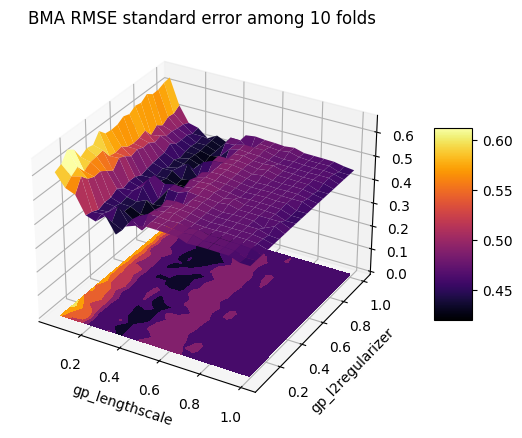

In [86]:
fig = plt.figure(figsize= (10,5))
rmse_mean_plot = df['rmse_std'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')

x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
x_grid, y_grid, rmse_mean_plot = x_grid.astype(np.float64), y_grid.astype(np.float64), rmse_mean_plot.astype(np.float64)
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno', 
                       edgecolor ='none')


fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE standard error among 10 folds')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                zdir ='z',
                offset = 0,
                cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_mean_plot))
# show plot
plt.show()

In [80]:
df = order
print(df[df['rmse_mean']==np.min(df['rmse_mean'])])
print(df[df['rmse_median']==np.min(df['rmse_median'])])

     lengthscale  l2regularizer  rmse_mean  rmse_median  rmse_std    pi_cov  \
186          0.5           0.35    0.87569     0.727167  0.446249  0.941176   

     pi_sum  nll_mean  nll_median   nll_std  
186      48  1.046123    0.968796  0.266226  
     lengthscale  l2regularizer  rmse_mean  rmse_median  rmse_std    pi_cov  \
203         0.55            0.2   0.900339      0.68845  0.492528  0.960784   

     pi_sum  nll_mean  nll_median   nll_std  
203      49  1.023641    0.923772  0.281763  


In [72]:
rmse_std_plot = df['rmse_std'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_std_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE std')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_std_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_std_plot))
# show plot
plt.show()

ValueError: cannot reshape array of size 398 into shape (20,20)

### BNE conservative sweep

In [77]:
def readbnetxt():
    data = []
    with open('softmax1.txt', 'r') as f:
        for line in f.readlines():
            line = line.strip('\n')
            line = line.split()
            data.append(line)
    #print(data)
    return data
df = readbnetxt()
# transfer list to dataframe
df = pd.DataFrame(df[1:], columns=df[0])
df

,lengthscale,l2regularizer,rmse_mean,rmse_median,rmse_std,pi_cov,pi_sum,nll_mean,nll_median,nll_std
0,0.05,0.05,1.211598,0.882207,0.603081,0.901961,46,1.309618,1.010461,0.601600
1,0.05,0.10,1.261335,1.037850,0.616183,0.921569,47,1.321971,0.997579,0.601086
2,0.05,0.15,1.252464,0.944832,0.655724,0.901961,46,1.321372,0.998233,0.608508
3,0.05,0.20,1.235599,0.953537,0.635962,0.901961,46,1.294068,0.968360,0.599692
4,0.05,0.25,1.214936,0.952740,0.586607,0.901961,46,1.304280,0.981391,0.598395
...,...,...,...,...,...,...,...,...,...,...
395,1.00,0.80,0.997290,0.851573,0.453012,0.921569,47,1.065360,1.002955,0.256181
396,1.00,0.85,0.997323,0.850519,0.452827,0.921569,47,1.065247,1.008014,0.254997
397,1.00,0.90,0.997512,0.849150,0.452489,0.921569,47,1.066792,1.014189,0.255435
398,1.00,0.95,0.997357,0.847673,0.452088,0.921569,47,1.066712,1.018426,0.254538


In [30]:
fig = plt.figure(figsize= (10,5))
rmse_bma_mean = order['rmse_bma_mean'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
#rmse_mean_plot = rmse_mean_plot.astype(np.float64)
ax = plt.axes(projection='3d')
x_grid, y_grid = order['lengthscale'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer']))), order['l2regularizer'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
# change the type of x_grid and y_grid to float
#x_grid, y_grid = x_grid.astype(np.float64), y_grid.astype(np.float64)
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_bma_mean, cmap='inferno', 
                       edgecolor ='none')


fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BNE RMSE (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_bma_mean,
                zdir ='z',
                offset = 0.8,
                cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0.9, 0.92)
# show plot
plt.show()

KeyError: 'rmse_bma_mean'

<Figure size 1000x500 with 0 Axes>

In [ ]:
# plot rmse_bma_mean, rmse_bma, rmse_bae, rmse_bne_vo, rmse_bne_vs 

rmse_bma_mean = order['rmse_bma_mean'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bma = order['rmse_bma'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bae = order['rmse_bae'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bne_vo = order['rmse_bne_vo'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bne_vs = order['rmse_bne_vs'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
#rmse_mean_plot = rmse_mean_plot.astype(np.float64)

x_grid, y_grid = order['lengthscale'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer']))), order['l2regularizer'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))

for rmse_name in [rmse_bma_mean, rmse_bma, rmse_bae, rmse_bne_vo, rmse_bne_vs]:
    fig = plt.figure(figsize= (10,5))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_name, cmap='inferno', 
                       edgecolor ='none')
    fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
    #ax.set_title()
    ax.set_xlabel('gp_lengthscale')
    ax.set_ylabel('gp_l2regularizer')
 
    cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_name,
                zdir ='z',
                offset = np.min(rmse_name)-0.02,
                cmap = 'inferno')
    # #cset = ax.contourf(x, y, z,
    #                    zdir ='x',
    #                    offset =-5,
    #                    cmap = my_cmap)
    # #cset = ax.contourf(x, y, z,
    #                    zdir ='y',
    #                    offset = 5,
    #                    cmap = my_cmap)

    ax.set_zlim(np.min(rmse_name)-0.02, np.max(rmse_name)+0.02)
    # show plot
plt.show()            


## Spatial Cross Validation - BMA mean

In [87]:
# read the data
df = pd.DataFrame(pd.read_csv("spcv6foldresults_until4.txt", sep=" "))
# sort the data
df = df.sort_values(by=['lengthscale', 'l2regularizer'])
# reset the index
df = df.reset_index(drop=True)
print(df.shape)

# print min and max of each column
for col in df.columns:
    print(col, df[col].min(), df[col].max())
    

(7228, 10)
lengthscale 0.025 4.525
l2regularizer 0.05 2.0
bma_mean_rmse_mean 0.89465255 1.4895091
bma_mean_rmse_median 0.81600505 1.433429
bma_mean_std 0.30273685 0.76350325
bma_mean_cov 0.8235294117647058 0.9607843137254902
nll_bma_mean_mean 0.9823308 1.7358718
nll_bma_mean_median 0.9285651 1.2587178
nll_bma_mean_std 0.07207997 1.5337498
Unnamed: 9 nan nan


check the missing points

In [ ]:
#find the missing one
for i in np.unique(df['lengthscale']):
    print(i)
    print(df[df['lengthscale']==i].shape)
print(df)
df = df.sort_values(by=['l2regularizer', 'lengthscale'])
# reset the index
df = df.reset_index(drop=True)
print(df)

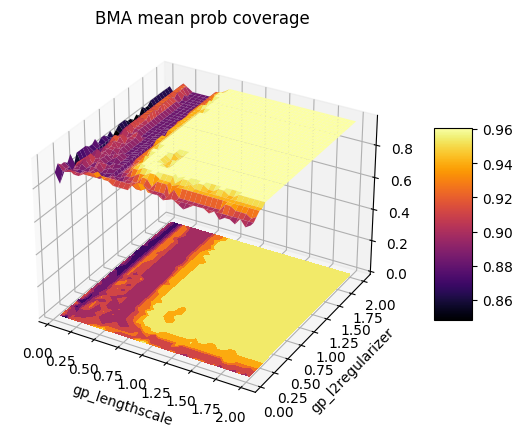

In [30]:
# plot the data
fig = plt.figure(figsize=(10, 5))
rmse_mean_plot = df['bma_mean_cov'].values.reshape(
    len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')

x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(
    df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
x_grid, y_grid, rmse_mean_plot = x_grid.astype(np.float64), y_grid.astype(
    np.float64), rmse_mean_plot.astype(np.float64)
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno',
                       edgecolor='none')


fig.colorbar(surf, ax=ax,
             shrink=0.5, aspect=5)
ax.set_title('BMA mean prob coverage')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')

cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                   zdir='z',
                   offset=0,
                   cmap='inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_mean_plot))
# show plot
plt.show()


In [88]:
print(df[df['bma_mean_rmse_mean']==np.min(df['bma_mean_rmse_mean'])])
print(df[df['bma_mean_rmse_median']==np.min(df['bma_mean_rmse_median'])])
print(df[df['nll_bma_mean_mean']==np.min(df['nll_bma_mean_mean'])])
print(df[df['nll_bma_mean_median']==np.min(df['nll_bma_mean_median'])])
print(df[df['bma_mean_cov']==np.max(df['bma_mean_cov'])])

      lengthscale  l2regularizer  bma_mean_rmse_mean  bma_mean_rmse_median  \
1120        0.725           0.05            0.894653              0.850056   

      bma_mean_std  bma_mean_cov  nll_bma_mean_mean  nll_bma_mean_median  \
1120      0.407589      0.921569           1.127794             0.948811   

      nll_bma_mean_std  Unnamed: 9  
1120           0.40492         NaN  
      lengthscale  l2regularizer  bma_mean_rmse_mean  bma_mean_rmse_median  \
4238        2.675            0.2            1.038841              0.816005   

      bma_mean_std  bma_mean_cov  nll_bma_mean_mean  nll_bma_mean_median  \
4238      0.416901      0.941176           1.040763             0.983803   

      nll_bma_mean_std  Unnamed: 9  
4238          0.180078         NaN  
      lengthscale  l2regularizer  bma_mean_rmse_mean  bma_mean_rmse_median  \
1617        1.025            0.9            1.095238              0.869766   

      bma_mean_std  bma_mean_cov  nll_bma_mean_mean  nll_bma_mean_median  \

## Spatial Cross Validation - BMA & BAE

In [91]:
# read the data
df = pd.DataFrame(pd.read_csv("spcv0412.txt", sep=" "))
# sort the data
df = df.sort_values(by=['lengthscale', 'l2regularizer'])
# reset the index
df = df.reset_index(drop=True)
print(df.shape)

# print min and max of each column
for col in df.columns:
    print(col, df[col].min(), df[col].max())

(1088, 14)
lengthscale 0.05 5.0
l2regularizer 0.05 5.0
bma_rmse_mean 1.0364866 inf
bma_rmse_median 0.8050055 inf
bma_std 0.41846153 455445380.0
bma_cov 0.9019607843137256 1.0
nll_bma_mean 1.0114578 1.0372133
nll_bma_median 0.9610789 0.96541095
bae_rmse_mean 1.0045389 5.7899346
bae_rmse_median 0.78924567 3.8665137
bae_std 0.36956173 5.204523
bae_cov 0.6666666666666666 1.0
nll_bae_mean 0.9353769 3.5096753
nll_bae_median 0.8956183 2.2378526


Print the min/max results for BMA & BAE

In [56]:
print(df[df['bma_rmse_mean']==np.min(df['bma_rmse_mean'])])
# start a new line
print()

print(df[df['bma_rmse_median']==np.min(df['bma_rmse_median'])])
print(df[df['nll_bma_mean']==np.min(df['nll_bma_mean'])])
print(df[df['nll_bma_median']==np.min(df['nll_bma_median'])])
print(df[df['bma_cov']==np.max(df['bma_cov'])])

      lengthscale  l2regularizer  bma_rmse_mean  bma_rmse_median   bma_std  \
80           0.05           4.05       0.902616         0.847859  0.393004   
180          0.10           4.05       0.902616         0.847859  0.393004   
280          0.15           4.05       0.902616         0.847859  0.393004   
380          0.20           4.05       0.902616         0.847859  0.393004   
1079         0.55           4.05       0.902616         0.847859  0.393004   
...           ...            ...            ...              ...       ...   
9571         4.80           4.05       0.902616         0.847859  0.393004   
9671         4.85           4.05       0.902616         0.847859  0.393004   
9771         4.90           4.05       0.902616         0.847859  0.393004   
9871         4.95           4.05       0.902616         0.847859  0.393004   
9971         5.00           4.05       0.902616         0.847859  0.393004   

       bma_cov  nll_bma_mean  nll_bma_median  bae_rmse_mean  ba

In [90]:
# reead txt and print the line with not 14 columns
with open("spcv0412.txt", "r") as f:
    for line in f:
        if len(line.split()) != 14:
            print(line)
            

0.7 0.05 inf inf nan 1.0 nan nan 1.1602968 0.86651003 0.56708574 0.8823529411764706 1.0586213 0.97788937 0.57966703 0.8823529411764706 1.0408752 0.9447588



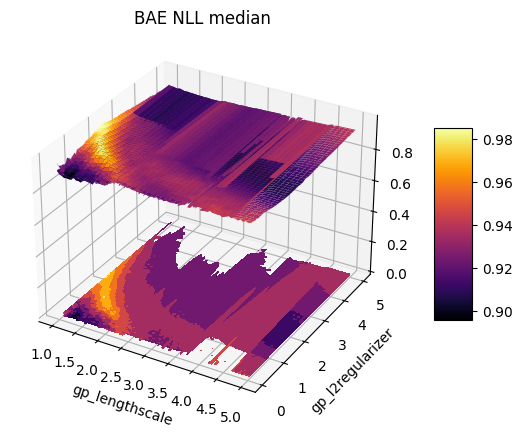

In [86]:
# plot the data
df = df[1900:]
fig = plt.figure(figsize=(10, 5))
rmse_mean_plot = df['nll_bae_median'].values.reshape(
    len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')

x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(
    df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
x_grid, y_grid, rmse_mean_plot = x_grid.astype(np.float64), y_grid.astype(
    np.float64), rmse_mean_plot.astype(np.float64)
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno',
                       edgecolor='none')


fig.colorbar(surf, ax=ax,
             shrink=0.5, aspect=5)
ax.set_title('BAE NLL median')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')

cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                   zdir='z',
                   offset=0,
                   cmap='inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_mean_plot))
# show plot
plt.show()


In [57]:
print(df[df['bae_rmse_mean']==np.min(df['bae_rmse_mean'])])
# start a new line
print()

print(df[df['bae_rmse_median']==np.min(df['bae_rmse_median'])])
print(df[df['nll_bae_mean']==np.min(df['nll_bae_mean'])])
print(df[df['nll_bae_median']==np.min(df['nll_bae_median'])])
print(df[df['bae_cov']==np.max(df['bae_cov'])])

      lengthscale  l2regularizer  bma_rmse_mean  bma_rmse_median   bma_std  \
5195          2.6           4.95       0.903163         0.848201  0.393485   

       bma_cov  nll_bma_mean  nll_bma_median  bae_rmse_mean  bae_rmse_median  \
5195  0.921569      1.076999        0.922281       0.878569         0.773149   

       bae_std   bae_cov  nll_bae_mean  nll_bae_median  
5195  0.374837  0.960784      1.000837         0.90715  

      lengthscale  l2regularizer  bma_rmse_mean  bma_rmse_median    bma_std  \
5099          2.6           0.15      185142.48        167194.81  40441.066   

       bma_cov  nll_bma_mean  nll_bma_median  bae_rmse_mean  bae_rmse_median  \
5099  0.901961      1.037215        0.965508       0.890123           0.7417   

       bae_std   bae_cov  nll_bae_mean  nll_bae_median  
5099  0.390844  0.901961      0.992732        0.928975  
    lengthscale  l2regularizer  bma_rmse_mean  bma_rmse_median   bma_std  \
19         0.05            1.0       0.902905          0.